In [23]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

import joblib
import pickle

In [9]:
california_housing = fetch_california_housing(as_frame=True)
california_housing_df = california_housing.frame

In [10]:
display(california_housing_df)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


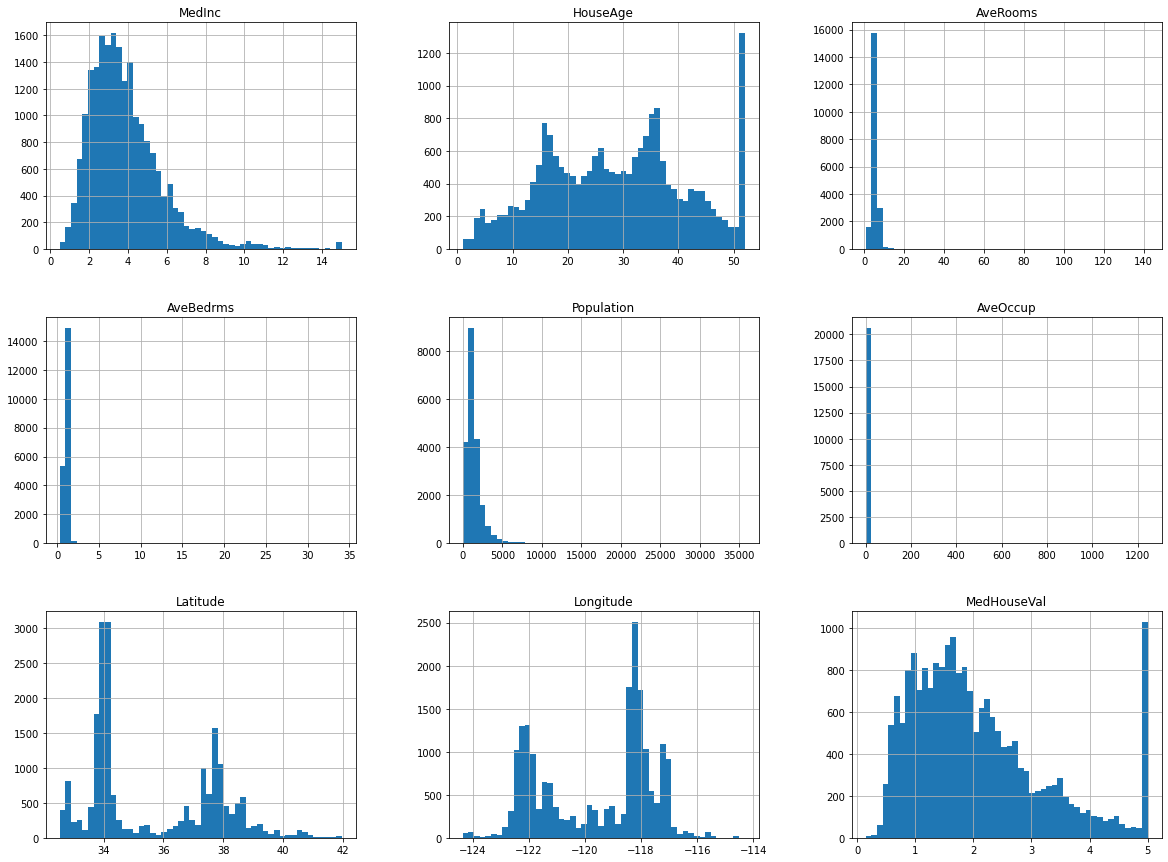

In [11]:
california_housing_df.hist(bins=50, figsize=(20, 15))
plt.show()

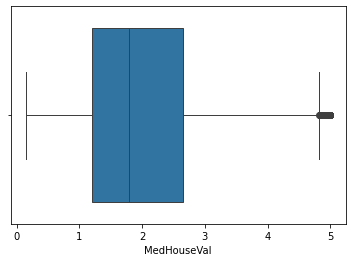

In [12]:
sns.boxplot(x=california_housing_df['MedHouseVal'])
plt.show()


/var/folders/r7/ylvb4f510wd1cn8yc3p1n74m0000gn/T/ipykernel_4340/3870103401.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=california_housing_df['MedInc'], shade=True)


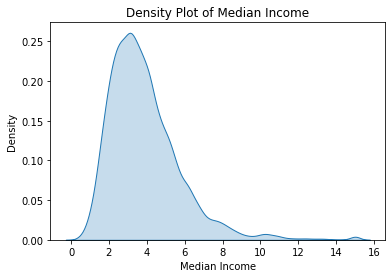

In [13]:
sns.kdeplot(data=california_housing_df['MedInc'], shade=True)
plt.xlabel('Median Income')
plt.ylabel('Density')
plt.title('Density Plot of Median Income')
plt.show()

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


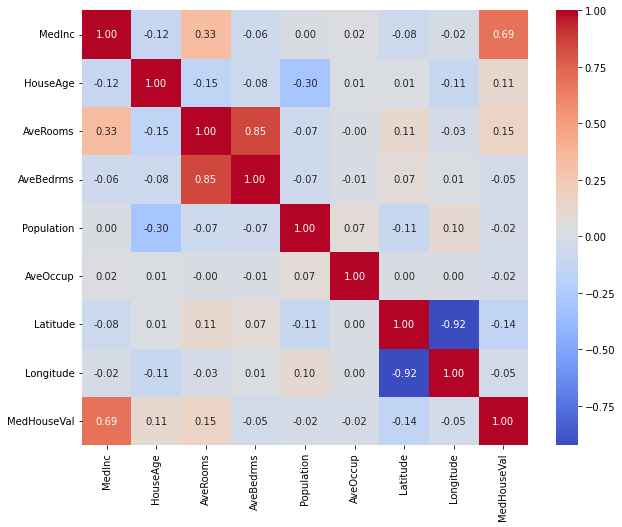

In [14]:
corr_matrix = california_housing_df.corr()

print(corr_matrix["MedHouseVal"].sort_values(ascending=False))

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


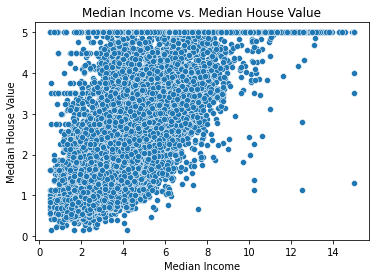

In [15]:
sns.scatterplot(x='MedInc', y='MedHouseVal', data=data)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median Income vs. Median House Value')
plt.show()


In [16]:


X = california_housing_df.drop("MedHouseVal", axis=1)
y = california_housing_df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
linear_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

linear_preds = linear_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

In [18]:
linear_rmse = mean_squared_error(y_test, linear_preds, squared=False)
rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)
xgb_rmse = mean_squared_error(y_test, xgb_preds, squared=False)

print(f"Linear Regression RMSE: {linear_rmse}")
print(f"Random Forest RMSE: {rf_rmse}")
print(f"XGBoost RMSE: {xgb_rmse}")

Linear Regression RMSE: 0.7455813830127762
Random Forest RMSE: 0.5067477004365527
XGBoost RMSE: 0.4717943691423984


In [24]:
X = california_housing_df.drop("MedHouseVal", axis=1)
y = california_housing_df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

linear_preds = linear_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

linear_rmse = mean_squared_error(y_test, linear_preds, squared=False)
rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)
xgb_rmse = mean_squared_error(y_test, xgb_preds, squared=False)

print(f"Linear Regression RMSE: {linear_rmse}")
print(f"Random Forest RMSE: {rf_rmse}")
print(f"XGBoost RMSE: {xgb_rmse}")

pickle.dump(rf_model, open('rf_model.pkl', 'wb'))

Linear Regression RMSE: 0.7455813830127762
Random Forest RMSE: 0.5067477004365527
XGBoost RMSE: 0.4717943691423984


In [30]:


model_file = open("rf_model.pkl",'rb')
random_forest_model = pickle.load(model_file)

In [31]:
data_dictionary= {
    "MedInc": 3.8716,
    "HouseAge": 21,
    "AveRooms": 4.875,
    "AveBedrms": 1.006,
    "Population": 322,
    "AveOccup": 2.555,
    "Latitude":37.422331,
    "Longitude":-122.0843455
    }

prediction_data_df=pd.DataFrame(data_dictionary, index=[0])


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93
...,...,...,...,...,...,...,...,...
15362,4.6050,16.0,7.002212,1.066372,1351.0,2.988938,33.36,-117.22
16623,2.7266,28.0,6.131915,1.256738,1650.0,2.340426,35.36,-120.83
18086,9.2298,25.0,7.237676,0.947183,1585.0,2.790493,37.31,-122.05
2144,2.7850,36.0,5.289030,0.983122,1227.0,2.588608,36.77,-119.76
